<a href="https://colab.research.google.com/github/LazyHooks/AI_Jobs_Disruption/blob/main/pp_aut.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

imports

In [255]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline
from sklearn.manifold import TSNE
from sklearn.metrics import silhouette_score
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

warning override

In [256]:
import warnings

warnings.filterwarnings('ignore')

input

In [257]:
df = pd.read_csv("pp_aut.csv")

exploratory

In [258]:
df.shape

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153 entries, 0 to 152
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Knowledge        153 non-null    int64
 1   Problem Solving  153 non-null    int64
 2   Interaction      153 non-null    int64
 3   Impact           153 non-null    int64
 4   Accountability   153 non-null    int64
dtypes: int64(5)
memory usage: 6.1 KB


In [259]:
df.head()

,Knowledge,Problem Solving,Interaction,Impact,Accountability
0,75,20,20,30,0
1,75,20,20,30,0
2,75,20,20,30,0
3,75,27,20,30,0
4,75,27,20,30,0


checks

In [260]:
df.isnull().sum()
df.describe()

,Knowledge,Problem Solving,Interaction,Impact,Accountability
count,153.000000,153.000000,153.000000,153.000000,153.000000
mean,108.450980,30.202614,41.405229,57.810458,6.307190
std,50.110791,6.864630,14.270617,23.707303,12.152691
min,54.000000,20.000000,20.000000,30.000000,0.000000
25%,75.000000,27.000000,36.000000,55.000000,0.000000
50%,75.000000,27.000000,36.000000,55.000000,0.000000
75%,124.000000,36.000000,52.000000,64.000000,0.000000
max,221.000000,65.000000,66.000000,168.000000,46.000000


In [261]:
X=df

Scaling

In [262]:
cols = X.columns

In [263]:
from sklearn.preprocessing import MinMaxScaler

ms = MinMaxScaler()

X = ms.fit_transform(X)

In [264]:
X = pd.DataFrame(X, columns=[cols])

In [265]:
X.head()

,Knowledge,Problem Solving,Interaction,Impact,Accountability
0,0.125749,0.000000,0.0,0.0,0.0
1,0.125749,0.000000,0.0,0.0,0.0
2,0.125749,0.000000,0.0,0.0,0.0
3,0.125749,0.155556,0.0,0.0,0.0
4,0.125749,0.155556,0.0,0.0,0.0


In [266]:
X.dropna(inplace=True)
X

,Knowledge,Problem Solving,Interaction,Impact,Accountability
0,0.125749,0.000000,0.000000,0.000000,0.000000
1,0.125749,0.000000,0.000000,0.000000,0.000000
2,0.125749,0.000000,0.000000,0.000000,0.000000
3,0.125749,0.155556,0.000000,0.000000,0.000000
4,0.125749,0.155556,0.000000,0.000000,0.000000
...,...,...,...,...,...
148,0.125749,0.155556,0.630435,0.710145,1.000000
149,0.125749,0.155556,0.630435,0.710145,1.000000
150,0.125749,0.622222,0.347826,1.000000,0.456522
151,0.125749,0.622222,0.347826,1.000000,0.543478


K means

In [267]:
# 2 cluster
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2, random_state=0) 

kmeans.fit(X)

KMeans(n_clusters=2, random_state=0)

centers

In [268]:
kmeans.cluster_centers_

array([[0.16123309, 0.20349794, 0.29508857, 0.18921095, 0.06239936],
       [0.72162342, 0.28246914, 0.87391304, 0.2310789 , 0.31642512]])

inertia

In [269]:
kmeans.inertia_

24.025652221567892

Elbow

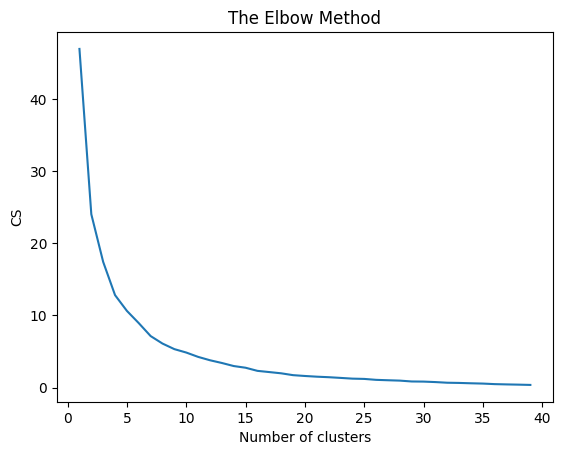

In [270]:
from sklearn.cluster import KMeans
cs = []
for i in range(1, 40):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(X)
    cs.append(kmeans.inertia_)
plt.plot(range(1, 40), cs)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('CS')
plt.show()

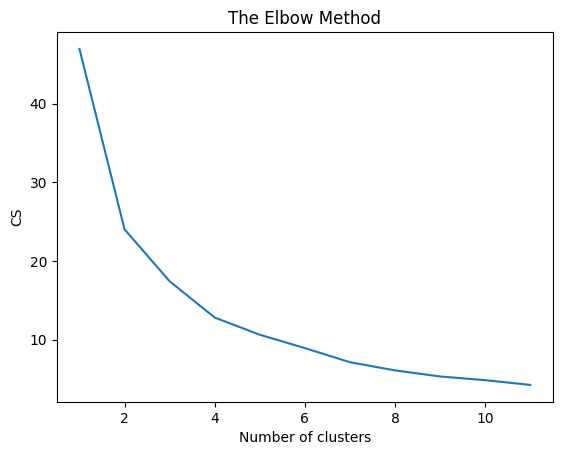

In [271]:
from sklearn.cluster import KMeans
cs = []
for i in range(1, 12):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(X)
    cs.append(kmeans.inertia_)
plt.plot(range(1, 12), cs)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('CS')
plt.show()

individual k mean

In [305]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2, random_state=0) 

kmeans.fit(X)

KMeans(n_clusters=2, random_state=0)

In [306]:
labels=kmeans.labels_
pd.DataFrame(labels).to_csv('pp_aut_l.csv')
print(labels)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0
 1 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0
 0 0 0 0 0 0 0 1 0 1 0 1 1 0 1 1 1 1 1 0 0 1 1 0 0 0 0 1 0 1 0 0 0 0 1 1 1
 1 0 1 0 0 1 0 0 0 0 0 0 0 0 1 1 1 0 1 1 1 0 1 1 0 1 1 0 1 0 0 1 0 0 1 0 1
 1 1 0 0 0]


In [307]:
Z=kmeans.cluster_centers_
Z

array([[0.16123309, 0.20349794, 0.29508857, 0.18921095, 0.06239936],
       [0.72162342, 0.28246914, 0.87391304, 0.2310789 , 0.31642512]])

In [308]:
import matplotlib

In [309]:
tsne = TSNE(n_components=2, verbose=1, perplexity=80, n_iter=2500, learning_rate=400)
tsne_scale_results = tsne.fit_transform(X)
tsne_df_scale = pd.DataFrame(tsne_scale_results, columns=['tsne1', 'tsne2'])

[t-SNE] Computing 152 nearest neighbors...
[t-SNE] Indexed 153 samples in 0.000s...
[t-SNE] Computed neighbors for 153 samples in 0.004s...
[t-SNE] Computed conditional probabilities for sample 153 / 153
[t-SNE] Mean sigma: 0.363473
[t-SNE] KL divergence after 250 iterations with early exaggeration: 42.463108
[t-SNE] KL divergence after 2500 iterations: -1.282153


In [310]:
np.unique(labels)


array([0, 1], dtype=int32)

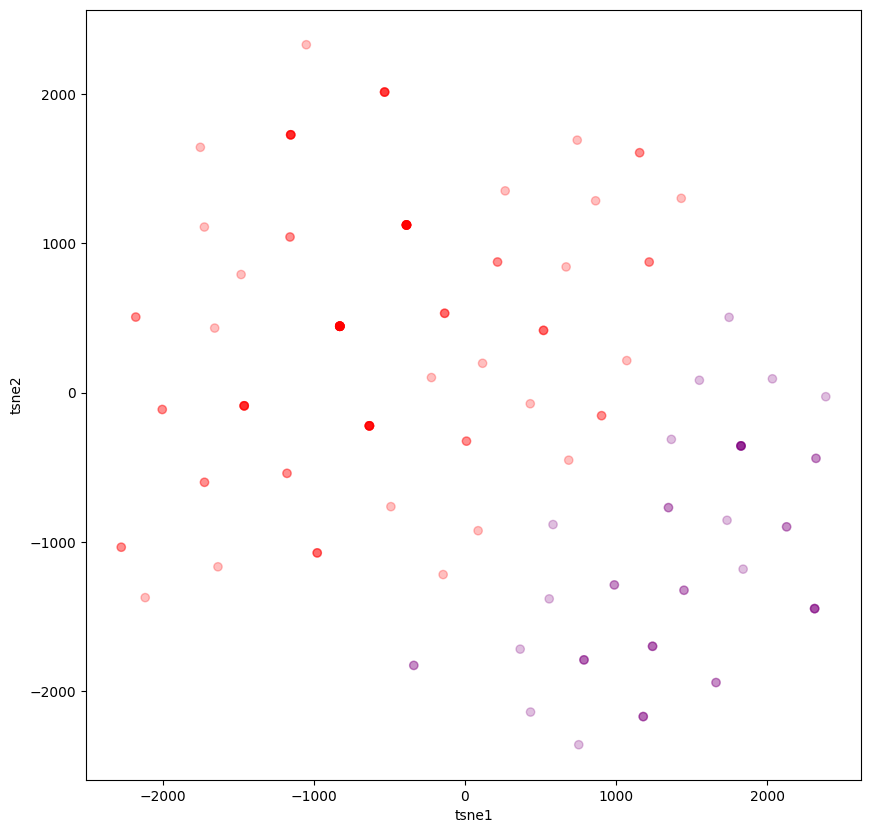

In [311]:
colors = ["red","green","blue","purple"]
plt.figure(figsize = (10,10))
plt.scatter(tsne_df_scale.iloc[:,0],tsne_df_scale.iloc[:,1],alpha=0.25, c=labels, cmap=matplotlib.colors.ListedColormap(colors))
plt.xlabel('tsne1')
plt.ylabel('tsne2')
plt.show()

Reverse Scaling

In [312]:
Z2 = ms.inverse_transform(Z)
pd.DataFrame(Z2).to_csv('cc_pp_aut.csv')
Z2

array([[ 80.92592593,  29.15740741,  33.57407407,  56.11111111,
          2.87037037],
       [174.51111111,  32.71111111,  60.2       ,  61.88888889,
         14.55555556]])